In [20]:
import sys
assert sys.version_info >= (3, 8)

import sklearn
assert sklearn.__version__ >= "0.23"

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'

Get the data

In [21]:
import urllib

DOWNLOAD_ROOT = 'https://storage.googleapis.com/properati-data-public/pe_properties.csv.gz'
DATASET_FOLDER = 'dataset'
FILE = 'properati.csv.gz'
PATH = os.path.join(DATASET_FOLDER, FILE)


def download_data(dataset_url = DOWNLOAD_ROOT, path=PATH, dirs=DATASET_FOLDER):
    if not os.path.isdir(dirs):
        os.makedirs(dirs)
    urllib.request.urlretrieve(dataset_url, path)
    print(f'Data downloaded on {path}')

In [22]:
download_data()

Data downloaded on dataset/properati.csv.gz


Load Data

In [23]:
import pandas as pd

def load_data(path=PATH):
    return pd.read_csv(path, compression='gzip')

In [24]:
properati = load_data()
properati

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,If8+Qw9kVWrz0MyanMXYBg==,Propiedad,2020-06-21,2020-07-13,2020-06-21,-5.176321,-80.609101,Perú,Piura,Piura,...,4.0,NaN,NaN,2800.0,PEN,NaN,Se ALQUILA CASA en Urb. Miraflores Country Clu...,<br />\n - Cocina\n- Jardín\n- Desagüe cloacal...,Casa,Alquiler
1,Jb5ZvbjW1oKcozhAsrW5Rw==,Propiedad,2020-06-21,2020-08-11,2020-06-21,-8.129240,-79.031986,Perú,La Libertad,Trujillo,...,2.0,NaN,NaN,2500.0,PEN,NaN,ALQUILER DE LOCAL-OFICINA ESTRENO 2 PISOS URB....,Local Vac&iacute;o en Alquiler ESTRENO de 170 ...,Local comercial,Alquiler
2,8a74SwrLDHG2cd5NilPbuw==,Propiedad,2020-06-21,2020-08-20,2020-06-21,-12.126700,-77.028128,Perú,Lima,Lima,...,1.0,NaN,NaN,850.0,USD,NaN,For Rent - Amoblado - en Pleno Corazón de Mira...,EN CALLE ALCANFORES - PARALELA A AVENIDA LARCO...,Departamento,Alquiler
3,zrmZn+sEXMZEmg5KqeydCw==,Propiedad,2020-06-21,2020-08-10,2020-06-21,-12.085464,-76.972707,Perú,Lima,Lima,...,1.0,NaN,NaN,1000.0,USD,NaN,El Espacio Necesario Para Tu Empresa - SMART O...,Oficinas Boutique - Edificio Time - Estreno<br...,Oficina,Alquiler
4,NA3Eix29094ZT0Y4tWCNGw==,Propiedad,2020-06-21,2020-09-30,2020-06-21,NaN,NaN,Perú,Lima,NaN,...,5.0,123.0,123.0,135000.0,USD,Mensual,***************EXCELENTE OPORTUNIDAD**********...,LINDA Y AMPLIA CASA EN VENTA URB. LOS SAIRES D...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105533,F6eeD2p6EWyo0GhGqn4aQA==,Propiedad,2020-07-07,2020-09-14,2020-07-07,-6.783299,-79.841578,Perú,Lambayeque,Chiclayo,...,4.0,NaN,NaN,2500.0,PEN,NaN,ALQUILER DE MODERNO DEPARTAMENTO AMUEBLADO EN ...,Moderno y amplio departamento completamente am...,Departamento,Alquiler
105534,1Nnlk/k4uaUzy2fNBCY0dg==,Propiedad,2020-07-07,2020-08-03,2020-07-07,-6.782816,-79.843869,Perú,Lambayeque,Chiclayo,...,5.0,NaN,NaN,2800.0,PEN,NaN,ALQUILER DE LINDO DEPARTAMENTO 3° PISO EN URB....,Lindo y moderno departamento en 3&deg; piso ub...,Departamento,Alquiler
105535,Z8Cz+am4MQcySBKZHQvTwg==,Propiedad,2020-07-07,2020-08-04,2020-07-07,-12.101944,-77.056642,Perú,Lima,Lima,...,6.0,NaN,NaN,5000.0,USD,NaN,ALQUILER DE OFICINA EN SAN ISIDRO,Amplia Casa acondicionada para Oficina en la C...,Oficina,Alquiler
105536,fYA91lTW4Qn9Ox0JDvDdMw==,Propiedad,2020-07-07,2020-09-01,2020-07-07,-12.074998,-77.071692,Perú,Lima,Lima,...,8.0,NaN,NaN,6000.0,PEN,NaN,ALQUILER DE AMPLIA CASA EN PUEBLO LIBRE,"ALQUILER DE CASA PARA OFICINA ADMINISTRATIVA, ...",Casa,Alquiler


In [25]:
properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105538 entries, 0 to 105537
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               105538 non-null  object 
 1   ad_type          105538 non-null  object 
 2   start_date       105538 non-null  object 
 3   end_date         105538 non-null  object 
 4   created_on       105538 non-null  object 
 5   lat              100119 non-null  float64
 6   lon              100119 non-null  float64
 7   l1               105538 non-null  object 
 8   l2               105538 non-null  object 
 9   l3               100461 non-null  object 
 10  l4               82706 non-null   object 
 11  l5               68 non-null      object 
 12  l6               0 non-null       float64
 13  rooms            18664 non-null   float64
 14  bedrooms         36493 non-null   float64
 15  bathrooms        73930 non-null   float64
 16  surface_total    53490 non-null   floa

In [26]:
properati.describe()

,lat,lon,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,100119.000000,100119.000000,0.0,18664.000000,36493.000000,73930.00000,53490.000000,3.862300e+04,1.037480e+05
mean,-12.064887,-76.514375,NaN,3.448618,2.977009,2.73548,641.886970,1.952391e+04,3.198451e+05
std,2.428147,2.155241,NaN,2.559570,2.331401,1.73394,8896.700248,3.501313e+06,1.331382e+06
min,-18.341223,-81.276001,NaN,1.000000,0.000000,1.00000,10.000000,1.000000e+00,0.000000e+00
25%,-12.149471,-77.058998,NaN,2.000000,2.000000,2.00000,81.000000,8.000000e+01,4.500000e+03
50%,-12.096663,-77.013000,NaN,3.000000,3.000000,2.00000,122.000000,1.240000e+02,1.100000e+05
75%,-12.034009,-76.928234,NaN,4.000000,4.000000,3.00000,225.000000,2.200000e+02,2.750000e+05
max,-3.482000,-69.101447,NaN,20.000000,36.000000,20.00000,500000.000000,6.879756e+08,1.111111e+08


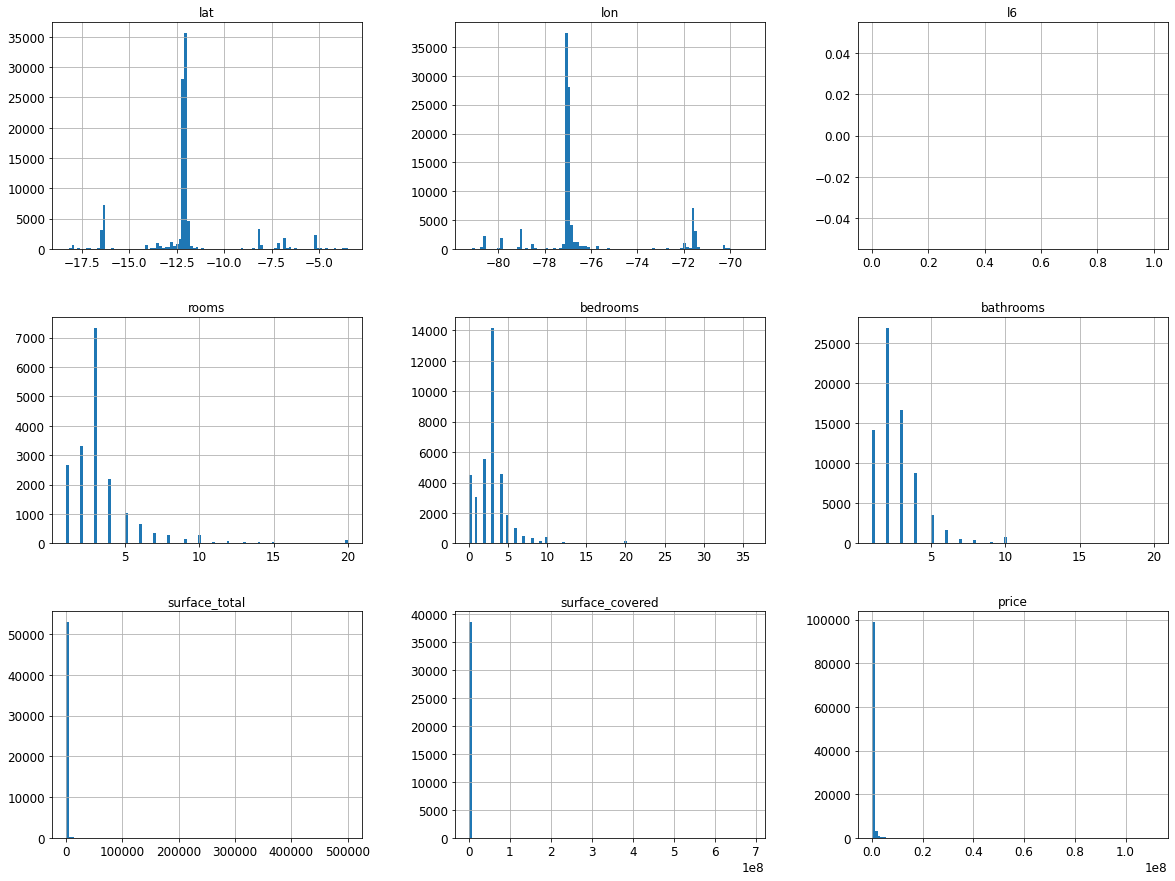

In [27]:
properati.hist(bins=100, figsize=(20,15))
plt.show()


I was thinking to do some data cleaning, but first i will split this and compare between random_sampling and strat_sampling. I want to compare cleaning before or after if there is any difference doing data cleaning on outliers for example.

In [28]:
np.random.seed(42)

In [29]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(properati, test_size=0.2, random_state=42)

In [30]:
train_set

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
33767,QpbQKC5qVkx0DxnH5D5qyA==,Propiedad,2019-11-05,9999-12-31,2019-11-05,-12.075137,-77.089815,Perú,Lima,Lima,...,NaN,50.0,50.0,1850.0,PEN,Mensual,Departamentos alquiler,"Departamento de Estreno, de 1 Amplia Habitaci...",Departamento,Alquiler
95333,ptMVHLJCKYjwxh9nzlXE4Q==,Propiedad,2019-12-05,2020-02-14,2019-12-05,-11.864826,-77.074430,Perú,Lima,Lima,...,NaN,NaN,NaN,45000.0,USD,NaN,GRAN OPORTUNIDAD / TERRENO EN VENTA,"Vendo terreno en zona muy tranquila, segura, c...",Otro,Venta
14029,GPUzBF/EK/Cp7lvRBxvCOg==,Propiedad,2020-05-22,2020-07-22,2020-05-22,-12.075106,-77.065729,Perú,Lima,Lima,...,3.0,NaN,NaN,225000.0,USD,NaN,"VENDO AMPLIO DEPARTAMENTO 94M2 $225,000 MIRAFL...",CARACTERISTICAS: \n-Sala comedor \n-Baño de vi...,Departamento,Venta
67887,r2Tn8TkgGtzyXSFJ/jhigA==,Propiedad,2019-08-13,2019-11-27,2019-08-13,-12.129000,-76.986000,Perú,Lima,Lima,...,2.0,152.0,NaN,250000.0,USD,NaN,"Lindo Departamento en Venta en Surco, Excelent...","Calle Melchormalo, Dpto. 201, Urb. Las Gardeni...",Departamento,Venta
46245,Jy10TiC3+YHhzkpokHlHqQ==,Propiedad,2020-07-30,2020-08-25,2020-07-30,-12.082683,-76.898023,Perú,Lima,Lima,...,1.0,54.0,53.0,2000.0,PEN,Mensual,Alquiler de Oficina Implementada,Edificio muy bien ubicado a cuadras de la Av. ...,Oficina,Alquiler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,10z8H8SP0+UZ/b5TdFUzzQ==,Propiedad,2019-11-27,2020-02-06,2019-11-27,-13.046871,-76.433287,Perú,Lima,NaN,...,NaN,NaN,NaN,1360000.0,USD,NaN,Terrenos Comerciales Venta Fundo Pampa De Los ...,Excelente terreno comercial ubicado en el km. ...,Otro,Venta
76820,o7m5Z2Imu5FqqaR0QyhZmQ==,Propiedad,2019-10-07,2019-12-10,2019-10-07,-12.090000,-77.070000,Perú,Lima,Lima,...,2.0,117.0,NaN,220000.0,USD,NaN,COD. 5701 ESPECTACULAR DEPARTAMENTO REMODELADO...,ESPECTACULAR DEPARTAMENTO REMODELADO IDEAL PAR...,Departamento,Venta
103694,+8l/AlkSG6iwMsk7v+1qcg==,Propiedad,2019-08-31,2019-09-02,2019-08-31,-12.142000,-76.991997,Perú,Lima,Lima,...,3.0,209.0,NaN,900.0,USD,NaN,Alquiler de Departamento Dúplex en Santiago De...,HERMOSO Y AMPLIO DUPLEX PRIMER PISO SALA SUPER...,Departamento,Alquiler
860,9BUTlbB8npPR5Fk8F7/lVA==,Propiedad,2019-08-02,2020-01-02,2019-08-02,-12.138035,-77.015165,Perú,Lima,Lima,...,3.0,84.0,84.0,469139.0,PEN,Mensual,HERMOSO DEPARTAMENTO CON BUENOS ACABADOS Y LIN...,EDIFICIO MUY BIEN UBICADO CERCA A ESTACIÓN DE ...,Departamento,Venta


<AxesSubplot:>

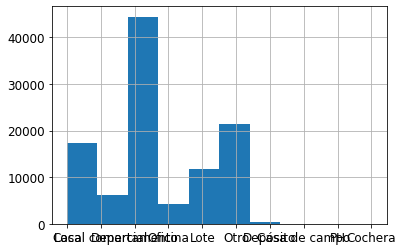

In [31]:
properati['property_type'].hist()

I think that property_type is important to predict price of a property, so i want to do some start sampling instead of random to reduce the error

In [32]:
properati['property_type'].value_counts()

Departamento       44409
Otro               21383
Casa               17223
Lote               11718
Local comercial     6112
Oficina             4158
Depósito             488
PH                    29
Casa de campo         10
Cochera                8
Name: property_type, dtype: int64

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(properati, properati['property_type']):
    strat_train_set = properati.loc[train_index]
    strat_test_set = properati.loc[test_index]

In [34]:
strat_test_set['property_type'].value_counts() / len(strat_test_set)

Departamento       0.420788
Otro               0.202625
Casa               0.163208
Lote               0.111048
Local comercial    0.057893
Oficina            0.039416
Depósito           0.004595
PH                 0.000284
Casa de campo      0.000095
Cochera            0.000047
Name: property_type, dtype: float64

In [35]:
strat_train_set['property_type'].value_counts() / len(strat_train_set)

Departamento       0.420786
Otro               0.202606
Casa               0.163188
Lote               0.111027
Local comercial    0.057918
Oficina            0.039394
Depósito           0.004631
PH                 0.000272
Casa de campo      0.000095
Cochera            0.000083
Name: property_type, dtype: float64

In [36]:
def property_type_proportions(data):
    return data['property_type'].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": property_type_proportions(properati),
    "Stratified": property_type_proportions(strat_test_set),
    "Random": property_type_proportions(test_set)
}).sort_index()

compare_props["Rand. perc. error"] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props["Strat. perc. error"] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

In [37]:
compare_props

,Overall,Stratified,Random,Rand. perc. error,Strat. perc. error
Casa,0.163192,0.163208,0.161171,-1.238590,0.009717
Casa de campo,0.000095,0.000095,0.000047,-50.000948,-0.001895
Cochera,0.000076,0.000047,NaN,NaN,-37.501184
Departamento,0.420787,0.420788,0.423394,0.619589,0.000357
Depósito,0.004624,0.004595,0.004785,3.481646,-0.616637
Local comercial,0.057913,0.057893,0.058414,0.865235,-0.034617
Lote,0.111031,0.111048,0.111143,0.100510,0.015172
Oficina,0.039398,0.039416,0.038564,-2.118257,0.046204
Otro,0.202609,0.202625,0.202151,-0.226368,0.007458
PH,0.000275,0.000284,0.000332,20.687368,3.446316


Concluding doing this comparison, we can see that when we use random sampling we have huge percentage of error for that ones that have low categorical values like Casa de Campo, Cochera. Doing Stratified sampling is better in this case but is not really important to try to predict these kind of properties, we can eliminate this records to not bias our sample.

First i will use as it comes,

I saw when i execute this i saw that my test_set does not have enough features

### Data Visualization and Data Cleaning

Ok, first i will start with some basic data cleaning

In [105]:
properati = strat_train_set.copy()
properati

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
10937,1gIfluxMQJdCxmSAOlURJw==,Propiedad,2020-06-04,2020-06-05,2020-06-04,-15.646428,-71.605217,Perú,Arequipa,Caylloma,...,NaN,NaN,NaN,60000.0,USD,NaN,Terreno en Chivay - wasi1370586,"En venta terreno en buena ubicación, en la sal...",Otro,Venta
76660,emvbD85tj8e+YrDtsWlR6g==,Propiedad,2019-10-07,2019-11-26,2019-10-07,-12.168000,-76.919998,Perú,Lima,Lima,...,NaN,NaN,NaN,160000.0,USD,NaN,COD.8512 LOCAL COMERCIAL EN EXCELENTE UBICACIÓ...,"EN PRIMER PISO, EXTERIOR DEL CENTRO COMERCIAL ...",Local comercial,Venta
67169,FPe7kf+LahB1mr3MP8RwPA==,Propiedad,2019-11-29,2020-02-14,2019-11-29,-16.386000,-71.549004,Perú,Arequipa,Arequipa,...,2.0,NaN,NaN,144500.0,USD,NaN,[proyecto Vía Vista] 5-D,Vía Vista es un edificio multifamiliar de 05 p...,Otro,Venta
6763,OdytwcNlXi5ZuzBclxU5sA==,Propiedad,2020-05-19,2020-07-29,2020-05-19,-13.421685,-71.848239,Perú,Cusco,Calca,...,20.0,382.0,200.0,2200.0,USD,Mensual,SE ALQUILA LINDO HOTEL EN PISAC - CUSCO,Se ofrece en alquiler acogedor hotel de catego...,Otro,Alquiler
99295,oh4iBQw5TN5M7D/kgBglSw==,Propiedad,2019-10-16,2020-01-14,2019-10-16,-12.077000,-77.091003,Perú,Lima,Lima,...,2.0,200.0,NaN,378000.0,USD,NaN,CASA EN ESQUINA FRENTE A PARQUE EN PANDO 7 ETAPA,CASA EN ESQUINA FRENTE A PARQUE EN PANDO 7 ETA...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40916,DKj506dwtH8bLf6UxCfQdg==,Propiedad,2020-02-06,2020-09-15,2020-02-06,-12.026210,-76.928949,Perú,Lima,Lima,...,NaN,500.0,500.0,600000.0,USD,Mensual,VENTA EXCELENTE LOCAL COMERCIAL,"*Primera Planta: Cuatro ambientes libres, para...",Local comercial,Venta
2454,eTN7ZUZ2Z9O5G610jUWy7w==,Propiedad,2019-12-14,2020-03-20,2019-12-14,-12.235709,-76.863180,Perú,Lima,Lima,...,10.0,300.0,7046.0,1270300.0,USD,Mensual,Excelente Casa de Campo de 300 mts cuadrados a...,A 2 cuadras de Canal 4 (Pachacamac) y 6 cuadra...,Lote,Venta
97428,y+nCn7974BC9dwZj44TXbA==,Propiedad,2019-10-16,2019-11-02,2019-10-16,-12.103000,-77.061996,Perú,Lima,Lima,...,1.0,45.0,NaN,500.0,USD,NaN,Vive en Magdalena del Mar en un mini departame...,"Departamento muy luminoso de una habitación ,...",Departamento,Alquiler
40477,EZPgUcmjAJ477+lOq6o3Ng==,Propiedad,2020-06-09,2020-06-10,2020-06-09,-12.269438,-76.863601,Perú,Lima,Lima,...,NaN,NaN,17920.0,4121600.0,USD,Mensual,¡¡¡OPORTUNIDAD DE TERRENO DE 17.920 M2 EN LA C...,"Oportunidad Terreno de 17,920.25 m2 de forma c...",Lote,Venta


In [42]:
properati.nunique()

def delete_single_values(data):
    print(f'old dataframe shape {data.shape}')
    num_unique_values = data.nunique()
    to_del = [i for i, v in enumerate(num_unique_values) if v <= 1]
    columns = data.columns[to_del]
    print(f'Columns to del {columns}')
    data = data.drop(columns, axis=1)
    print(f'new dataframe shape {data.shape}')
    return data

In [ ]:
properati = delete_single_values(properati)

Try to handle values that has few values.

In [21]:
properati.nunique()

id                 84309
start_date           390
end_date             448
created_on           390
lat                32914
lon                32430
l2                    25
l3                    81
l4                   157
l5                    20
rooms                 20
bedrooms              25
bathrooms             20
surface_total       1682
surface_covered     1849
price               7357
currency               3
title              58468
description        68412
property_type         10
operation_type         3
dtype: int64

In [22]:
print(properati['currency'].value_counts())
print(properati['operation_type'].value_counts())

USD    66353
PEN    16527
ARS        5
Name: currency, dtype: int64
Venta                60048
Alquiler             24243
Alquiler temporal       18
Name: operation_type, dtype: int64


Okey i wont remove any of these values because this is outliers and when i will be removing outliers i will do it if it is an outlier.

In [23]:
properati.var()

lat                5.906617e+00
lon                4.656230e+00
rooms              6.582274e+00
bedrooms           5.465259e+00
bathrooms          2.998980e+00
surface_total      7.524287e+07
surface_covered    3.681274e+09
price              1.817820e+12
dtype: float64

Identifying and removing rows that contain duplicate data, as we can see there is not duplicated data, we will check after doing some cleaning to see, but right now there isn't

In [24]:
properati.duplicated()

46039    False
6767     False
24128    False
56913    False
32947    False
         ...  
90900    False
25939    False
47032    False
89210    False
86474    False
Length: 84309, dtype: bool

Removing outliers!

In [25]:
properati.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,79968.000000,79968.000000,15012.000000,29059.000000,59022.000000,42861.000000,3.096100e+04,8.293200e+04
mean,-12.064939,-76.513379,3.450706,2.987543,2.733743,633.909218,1.556642e+03,3.204427e+05
std,2.430353,2.157830,2.565594,2.337789,1.731756,8674.264973,6.067351e+04,1.348266e+06
min,-18.341223,-81.276001,1.000000,0.000000,1.000000,10.000000,1.000000e+00,0.000000e+00
25%,-12.149471,-77.058998,2.000000,2.000000,2.000000,81.000000,8.000000e+01,4.500000e+03
50%,-12.096743,-77.013000,3.000000,3.000000,2.000000,123.000000,1.240000e+02,1.100000e+05
75%,-12.033825,-76.928234,4.000000,4.000000,3.000000,225.000000,2.210000e+02,2.750000e+05
max,-3.482000,-69.101447,20.000000,36.000000,20.000000,500000.000000,9.791097e+06,1.111111e+08


In [43]:
from numpy import percentile
def remove_interquartile_outlier(column, data):
    data = data.dropna(subset=[column])
    q25, q75 = percentile(data[column], 25), percentile(data[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print(f'Shape before removing iqr outliers {data.shape}')
    outliers_removed = [x for x, v in enumerate(data[column]) if v >= lower and v <= upper]
    print(len(outliers_removed))
    data = data.iloc[outliers_removed]
    print(f'Shape after removing iqr outliers {data.shape}')
    return data

In [ ]:
properati = remove_interquartile_outlier('price', properati)

<AxesSubplot:>

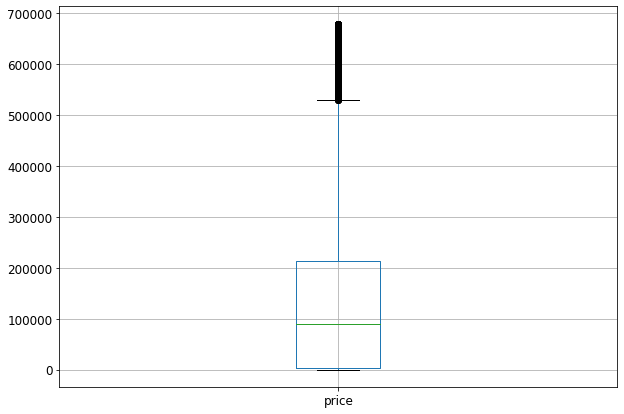

In [27]:
properati.boxplot(column=['price'], figsize=(10,7))

<AxesSubplot:>

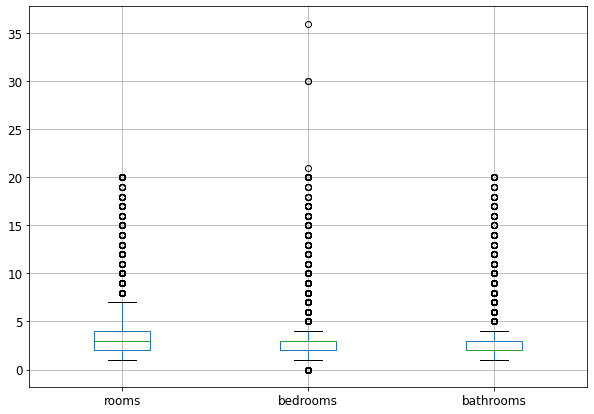

In [28]:
properati.boxplot(column=['rooms', 'bedrooms', 'bathrooms'],figsize=(10,7))

<AxesSubplot:>

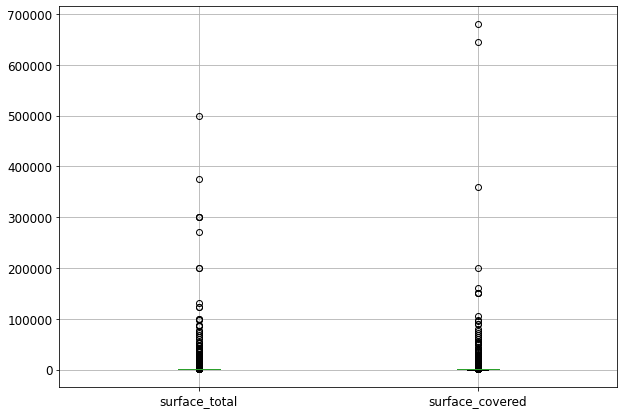

In [29]:
properati.boxplot(column=['surface_total', 'surface_covered'],figsize=(10,7))

In [30]:
properati.skew()

lat                 0.583867
lon                 1.320525
rooms               3.138733
bedrooms            2.778717
bathrooms           2.716887
surface_total      61.000979
surface_covered    76.966676
price               1.330949
dtype: float64

In [44]:
def remove_zero_price(data):
    print(f'shape before removing zero price {data.shape}')
    data = data[data['price'] != 0]
    print(f'shape after removing zero price {data.shape}')
    return data

In [ ]:
properati = remove_zero_price(properati)

In [32]:
properati.isnull().sum() / len(properati) * 100

id                  0.000000
start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 5.182487
lon                 5.182487
l2                  0.000000
l3                  4.790356
l4                 21.520832
l5                 99.936411
rooms              81.561900
bedrooms           65.010267
bathrooms          27.238524
surface_total      48.542094
surface_covered    62.771412
price               0.000000
currency            0.000000
title               0.000000
description         0.003974
property_type       0.000000
operation_type      0.000000
dtype: float64

In [57]:
def drop_near_to_null_columns(data):
    print(f'before dataframe shape {data.shape}')
    percentages = data.isnull().sum() / len(properati) * 100
    to_del = [i for i, v in enumerate(percentages) if v >= 99]
    columns = data.columns[to_del]
    print(f'Columns to del {columns}')
    data = data.drop(columns, axis=1)
    print(f'after dataframe shape {data.shape}')
    return data

In [34]:
properati = drop_near_to_null_columns(properati)

before dataframe shape (75485, 21)
percentages id                  0.000000
start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 5.182487
lon                 5.182487
l2                  0.000000
l3                  4.790356
l4                 21.520832
l5                 99.936411
rooms              81.561900
bedrooms           65.010267
bathrooms          27.238524
surface_total      48.542094
surface_covered    62.771412
price               0.000000
currency            0.000000
title               0.000000
description         0.003974
property_type       0.000000
operation_type      0.000000
dtype: float64
Columns to del Index(['l5'], dtype='object')
after dataframe shape (75485, 20)


<AxesSubplot:xlabel='lon', ylabel='lat'>

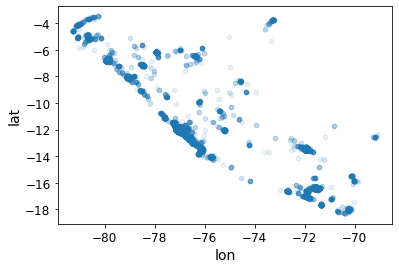

In [35]:
properati.plot(kind="scatter", x="lon", y="lat", alpha=0.1)

In [36]:
properati['l2'].value_counts()

Lima             55228
Arequipa          8377
La Libertad       2999
Piura             1982
Lambayeque        1539
Ica                925
Cajamarca          845
Cusco              765
Callao             635
Tacna              520
San Martin         260
Huánuco            217
Amazonas           204
Moquegua           168
Junín              164
Ancash             148
Loreto             122
Puno               103
Tumbes              95
Ucayali             59
Pasco               48
Apurimac            33
Madre de Dios       29
Ayacucho            20
Name: l2, dtype: int64

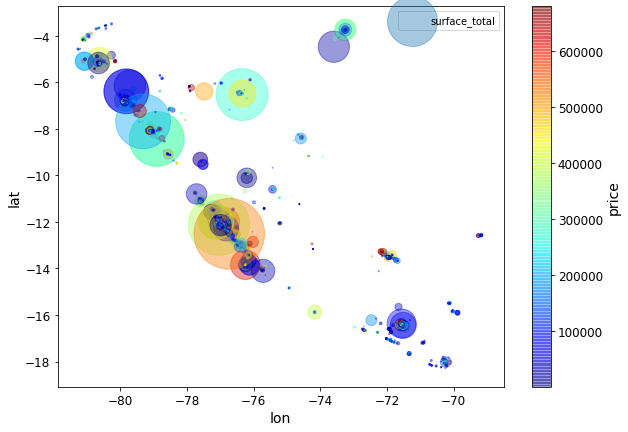

In [37]:
properati.plot(kind="scatter", x="lon", y="lat", alpha=0.4,
    s=properati['surface_total'].fillna(0)/100, label="surface_total", figsize=(10, 7),
    c="price", cmap=plt.get_cmap('jet'), colorbar=True, sharex=False
    )
plt.legend()

# c="price", cmap=plt.get_cmap('jet'), colorbar=True, sharex=False

As we see here without doing data cleaning, we cannot make good visualizations So i will do data cleaning. After removing outliers on price we can clearly see that in the right down there is lower prices and smaller properties, instead in the center and upper left. Maybe this is totally correlated with the location

LOOKING FOR CORRELATIONS

In [38]:
corr_matrix = properati.corr()
corr_matrix

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.881709,-0.026082,-0.001284,-0.007998,0.029884,0.022692,-0.011247
lon,-0.881709,1.000000,0.071128,0.026183,0.043356,-0.009856,0.009122,-0.016004
rooms,-0.026082,0.071128,1.000000,0.503819,0.694768,-0.012265,0.013721,0.203073
bedrooms,-0.001284,0.026183,0.503819,1.000000,0.683674,0.017491,-0.031928,0.231550
bathrooms,-0.007998,0.043356,0.694768,0.683674,1.000000,0.037848,0.044155,0.311019
surface_total,0.029884,-0.009856,-0.012265,0.017491,0.037848,1.000000,0.138147,0.032550
surface_covered,0.022692,0.009122,0.013721,-0.031928,0.044155,0.138147,1.000000,0.029716
price,-0.011247,-0.016004,0.203073,0.231550,0.311019,0.032550,0.029716,1.000000


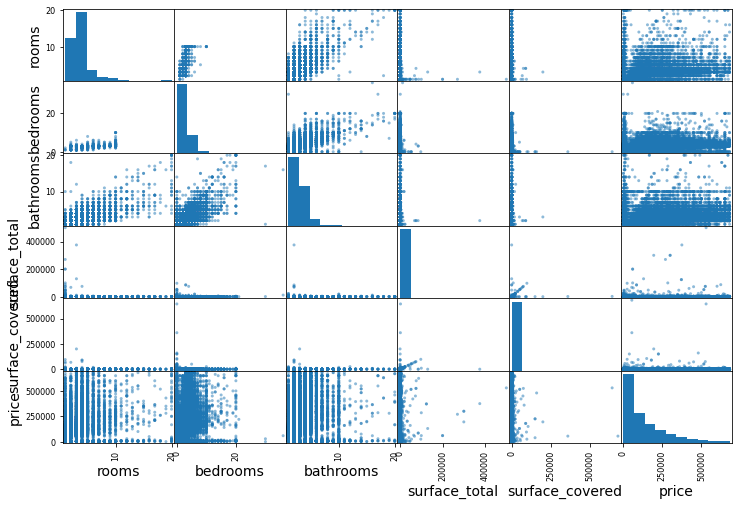

In [39]:
from pandas.plotting import scatter_matrix

attributes = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']

scatter_matrix(properati[attributes], figsize=(12,8))
plt.show()

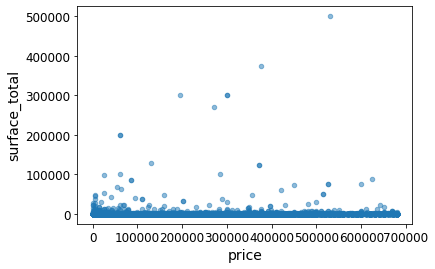

In [40]:
properati.plot(kind='scatter', x='price', y='surface_total', alpha=0.5)
plt.show()

We will handle missing values, first lat and long has missing values we will remove them because the location is an important thing, without maybe we will be overfitting our model. Another option is to obtain lat and log from other columns

In [46]:
def delete_lat_lon_missing_values(data):
    print(f'Shape before deleting lat,lon missing values {data.shape}')
    data = data.dropna(subset=['lat', 'lon'])
    print(f'Shape after deleting lat,lon missing values {data.shape}')
    return data


In [42]:
properati = delete_lat_lon_missing_values(properati)

Shape before deleting lat,lon missing values (75485, 20)
Shape after deleting lat,lon missing values (71573, 20)


In [43]:
properati.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,71573.000000,71573.000000,12916.000000,24831.000000,51896.000000,36378.000000,25855.000000,71573.000000
mean,-12.079661,-76.506819,3.332843,2.926382,2.610124,327.822310,426.698318,139179.563998
std,2.428792,2.163357,2.333020,2.125971,1.574135,5090.617777,6968.253366,155936.811762
min,-18.341223,-81.276001,1.000000,0.000000,1.000000,10.000000,1.000000,21.000000
25%,-12.149471,-77.060222,2.000000,2.000000,2.000000,80.000000,80.000000,3000.000000
50%,-12.097000,-77.014709,3.000000,3.000000,2.000000,120.000000,120.000000,90000.000000
75%,-12.033568,-76.937659,4.000000,3.000000,3.000000,199.000000,200.000000,215000.000000
max,-3.482088,-69.101447,20.000000,30.000000,20.000000,500000.000000,680954.000000,680000.000000


To handle missing values fpr rooms, bedrooms, bathrooms, surface_total and surface_covered i will handle this with statistical strategy

In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [45]:
properati.head()

,id,start_date,end_date,created_on,lat,lon,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
46039,uVyLWkA+YAv3HlPJzHRcDQ==,2019-08-27,2019-09-03,2019-08-27,-16.411959,-71.552863,Arequipa,Arequipa,Arequipa,3.0,NaN,3.0,128.0,128.0,135000.0,USD,SE VENDE CALIDO Y ACOGEDOR DEPARTAMENTO EN ASI...,Se vende acogedor departamento ubicado en segu...,Departamento,Venta
6767,dOIVsBUKtr2JUS7KUmDqWg==,2019-11-03,2019-12-24,2019-11-03,-12.082646,-77.093053,Lima,Lima,San Miguel,3.0,NaN,2.0,81.0,81.0,109500.0,USD,Vendo dpto recién remodelado ubicado en Condom...,Vendo dpto recién remodelado ubicado en Condom...,Departamento,Venta
24128,c3vRCaN3PhdwNXAoz+DxvA==,2019-12-12,2020-02-28,2019-12-12,-16.390195,-71.544426,Arequipa,Arequipa,Yanahuara,6.0,NaN,6.0,500.0,600.0,5500.0,USD,"Excelente local comercial en Yanahuara, ideal ...",Excelente local comercial construido expresame...,Local comercial,Alquiler
56913,s8tpDtRxrnraRot8xrLVPw==,2019-07-22,2020-01-02,2019-07-22,-12.094092,-77.078223,Lima,Lima,San Miguel,1.0,NaN,1.0,40.0,40.0,330822.0,PEN,HERMOSO DEPARTAMENTO FRENTE AL MAR CON BUENOS ...,DEPARTAMENTO EN LINDO EDIFICIO CON PISCINA SAL...,Departamento,Venta
32947,4yZVDMabeoF4GaCzr5vxdg==,2019-12-10,2019-12-13,2019-12-10,-16.743000,-72.283000,Arequipa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330000.0,USD,Hermosa casa de playa en venta en exclusiva Ur...,Herrmosa casa de playa con piscina en Urb San ...,Otro,Venta


In [46]:
properati_numerical = properati.drop(['id', 'start_date', 'end_date', 'created_on', 'l2', 'l3', 'l4', 'title', 'description', 'property_type', 'operation_type', 'price', 'currency'], axis=1).copy()
properati_numerical.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
46039,-16.411959,-71.552863,3.0,NaN,3.0,128.0,128.0
6767,-12.082646,-77.093053,3.0,NaN,2.0,81.0,81.0
24128,-16.390195,-71.544426,6.0,NaN,6.0,500.0,600.0
56913,-12.094092,-77.078223,1.0,NaN,1.0,40.0,40.0
32947,-16.743000,-72.283000,NaN,NaN,NaN,NaN,NaN


In [47]:
imputer.fit(properati_numerical)

SimpleImputer(strategy='median')

In [48]:
imputer.statistics_

array([-12.09700012, -77.0147086 ,   3.        ,   3.        ,
         2.        , 120.        , 120.        ])

In [49]:
properati_numerical.median().values

array([-12.09700012, -77.0147086 ,   3.        ,   3.        ,
         2.        , 120.        , 120.        ])

In [50]:
X =  imputer.transform(properati_numerical)

In [51]:
properati_tr = pd.DataFrame(X, columns=properati_numerical.columns, index=properati.index)

In [52]:
properati_tr

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
46039,-16.411959,-71.552863,3.0,3.0,3.0,128.0,128.0
6767,-12.082646,-77.093053,3.0,3.0,2.0,81.0,81.0
24128,-16.390195,-71.544426,6.0,3.0,6.0,500.0,600.0
56913,-12.094092,-77.078223,1.0,3.0,1.0,40.0,40.0
32947,-16.743000,-72.283000,3.0,3.0,2.0,120.0,120.0
...,...,...,...,...,...,...,...
92122,-12.087000,-77.083000,3.0,2.0,1.0,56.0,120.0
90900,-12.068235,-76.957758,3.0,3.0,2.0,60.0,120.0
25939,-12.174000,-77.009003,3.0,2.0,2.0,55.0,120.0
47032,-12.114723,-77.004256,1.0,3.0,1.0,39.0,39.0


Let's process categorical features 'start_date', 'end_date', 'created_on', 'l2', 'l3', 'l4', 'title', 'description', 'property_type', 'operation_type', 'price', 'currency'

In [53]:
(properati['start_date'] == properati['end_date']).sum()

1484

In [54]:
(properati['created_on'] == properati['start_date']).sum()

71573

As we can see there is nor correlation between date and price, also created_on is equal to start_date and end_date does not have correlation so we will remove. Also I will remove location columns because we have lat and lon as location, i will use only l2 that does not have nan values.

In [47]:
def drop_date_and_location_columns(data):
    print(f'shape before removal {data.shape}')
    data = data.drop(['start_date', 'end_date', 'l3', 'l4'], axis=1)
    print(f'shape after removal {data.shape}')
    return data



In [ ]:
properati = drop_date_and_location_columns(properati)

In [48]:
def drop_unused_columns(data):
    print(f'shape before removal {data.shape}')
    data = data.drop(['title', 'description'], axis=1)
    print(f'shape after removal {data.shape}')
    return data

In [57]:
properati = drop_unused_columns(properati)

shape before removal (71573, 16)
shape after removal (71573, 14)


In [58]:
properati.head()

,id,created_on,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
46039,uVyLWkA+YAv3HlPJzHRcDQ==,2019-08-27,-16.411959,-71.552863,Arequipa,3.0,NaN,3.0,128.0,128.0,135000.0,USD,Departamento,Venta
6767,dOIVsBUKtr2JUS7KUmDqWg==,2019-11-03,-12.082646,-77.093053,Lima,3.0,NaN,2.0,81.0,81.0,109500.0,USD,Departamento,Venta
24128,c3vRCaN3PhdwNXAoz+DxvA==,2019-12-12,-16.390195,-71.544426,Arequipa,6.0,NaN,6.0,500.0,600.0,5500.0,USD,Local comercial,Alquiler
56913,s8tpDtRxrnraRot8xrLVPw==,2019-07-22,-12.094092,-77.078223,Lima,1.0,NaN,1.0,40.0,40.0,330822.0,PEN,Departamento,Venta
32947,4yZVDMabeoF4GaCzr5vxdg==,2019-12-10,-16.743000,-72.283000,Arequipa,NaN,NaN,NaN,NaN,NaN,330000.0,USD,Otro,Venta


In [49]:
def conv_created_on_column_in_numeric(data):
    print(f'shape before conversion {data.shape}')
    data['created_on'] = pd.to_datetime(data['created_on'])
    data['year'] = data['created_on'].dt.year
    data['month'] = data['created_on'].dt.month
    data['day'] = data['created_on'].dt.day
    data = data.drop(['created_on'], axis=1)
    print(f'shape after conversion {data.shape}')
    return data

In [60]:
properati = conv_created_on_column_in_numeric(properati)
properati

shape before conversion (71573, 14)
shape after conversion (71573, 16)


,id,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type,year,month,day
46039,uVyLWkA+YAv3HlPJzHRcDQ==,-16.411959,-71.552863,Arequipa,3.0,NaN,3.0,128.0,128.0,135000.0,USD,Departamento,Venta,2019,8,27
6767,dOIVsBUKtr2JUS7KUmDqWg==,-12.082646,-77.093053,Lima,3.0,NaN,2.0,81.0,81.0,109500.0,USD,Departamento,Venta,2019,11,3
24128,c3vRCaN3PhdwNXAoz+DxvA==,-16.390195,-71.544426,Arequipa,6.0,NaN,6.0,500.0,600.0,5500.0,USD,Local comercial,Alquiler,2019,12,12
56913,s8tpDtRxrnraRot8xrLVPw==,-12.094092,-77.078223,Lima,1.0,NaN,1.0,40.0,40.0,330822.0,PEN,Departamento,Venta,2019,7,22
32947,4yZVDMabeoF4GaCzr5vxdg==,-16.743000,-72.283000,Arequipa,NaN,NaN,NaN,NaN,NaN,330000.0,USD,Otro,Venta,2019,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92122,T+0nx6G++QJHXf3htE0WYw==,-12.087000,-77.083000,Lima,NaN,2.0,1.0,56.0,NaN,1700.0,PEN,Departamento,Alquiler,2019,10,16
90900,dEo8FwnCwmVwNGFIXBQ+PQ==,-12.068235,-76.957758,Lima,NaN,NaN,2.0,60.0,NaN,920.0,USD,Oficina,Alquiler,2019,10,16
25939,tKlh9ORuotMRFS5r8L5C/w==,-12.174000,-77.009003,Lima,NaN,2.0,2.0,55.0,NaN,58000.0,USD,Departamento,Venta,2019,11,6
47032,QBU14W440ownqCNX3wMi8g==,-12.114723,-77.004256,Lima,1.0,NaN,1.0,39.0,39.0,52000.0,USD,Departamento,Venta,2019,9,13


In [61]:
pd.get_dummies(properati, drop_first=True, columns=['l2', 'currency', 'property_type', 'operation_type']).shape

(71573, 48)

In [62]:
properati_cat = properati[['l2', 'currency', 'property_type', 'operation_type']]
properati_cat.head()

,l2,currency,property_type,operation_type
46039,Arequipa,USD,Departamento,Venta
6767,Lima,USD,Departamento,Venta
24128,Arequipa,USD,Local comercial,Alquiler
56913,Lima,PEN,Departamento,Venta
32947,Arequipa,USD,Otro,Venta


In [63]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder= OneHotEncoder()
properati_cat_hot = cat_encoder.fit_transform(properati_cat)
properati_cat_hot

<71573x40 sparse matrix of type '<class 'numpy.float64'>'
	with 286292 stored elements in Compressed Sparse Row format>

In [64]:
properati_cat_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [65]:
cat_encoder.categories_

[array(['Amazonas', 'Ancash', 'Apurimac', 'Arequipa', 'Ayacucho',
        'Cajamarca', 'Callao', 'Cusco', 'Huánuco', 'Ica', 'Junín',
        'La Libertad', 'Lambayeque', 'Lima', 'Loreto', 'Madre de Dios',
        'Moquegua', 'Pasco', 'Piura', 'Puno', 'San Martin', 'Tacna',
        'Tumbes', 'Ucayali'], dtype=object),
 array(['ARS', 'PEN', 'USD'], dtype=object),
 array(['Casa', 'Casa de campo', 'Cochera', 'Departamento', 'Depósito',
        'Local comercial', 'Lote', 'Oficina', 'Otro', 'PH'], dtype=object),
 array(['Alquiler', 'Alquiler temporal', 'Venta'], dtype=object)]

Due this is a fast model approach, we will keep this like this and see what happends. Maybe replacing each province with its population or gdp could be better. Okey we will make some custom transformers.

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin

class CleanAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, remove_price=True):
        self.remove_price = remove_price
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = delete_single_values(X)
        X = drop_near_to_null_columns(X)
        X = remove_interquartile_outlier('price', X)
        X = remove_zero_price(X)
        X = delete_lat_lon_missing_values(X)
        X = drop_date_and_location_columns(X)
        X = drop_unused_columns(X)
        X = conv_created_on_column_in_numeric(X)
        X = X.set_index('id')
        if self.remove_price:
            X = X.drop('price', axis=1)
        return X
    
cleaner = CleanAttributes()
properati_clean = cleaner.transform(properati)
cleaner_with_price = CleanAttributes(remove_price = False)
properati_clean_price = cleaner_with_price.transform(properati)

old dataframe shape (84309, 25)
Columns to del Index(['ad_type', 'l1', 'l6', 'price_period'], dtype='object')
new dataframe shape (84309, 21)
before dataframe shape (84309, 21)
percentages id                  0.000000
start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 5.148916
lon                 5.148916
l2                  0.000000
l3                  4.804944
l4                 21.720101
l5                 99.933578
rooms              82.194072
bedrooms           65.532743
bathrooms          29.993239
surface_total      49.162011
surface_covered    63.276756
price               1.633278
currency            1.689025
title               0.000000
description         0.003558
property_type       0.000000
operation_type      0.000000
dtype: float64
Columns to del Index(['l5'], dtype='object')
after dataframe shape (84309, 20)
Shape before removing iqr outliers (82932, 20)
75532
Shape after removing iqr outliers (75532, 20)
shape bef

In [119]:
dolar_to_soles_conversion = 3.61 #5 Oct 2020 Peru

In [120]:
# i will be converting to PEN (Soles Peruanos) using actual conversion on the market
# properati_currency = clean_attributes(strat_train_set.copy())

def convert_currency(data, currency_value):
    print(f'shape before conversion {data.shape}')
    
    indexes = data['currency'].value_counts().index
    if 'ARS' in indexes: 
        data = data[data['currency'] != 'ARS']
    data['price'] = data.apply(lambda x: x['price'] * currency_value if x['currency'] == 'USD' else x['price'], axis=1)
    data = data.drop('currency', axis=1)
    print(f'shape after conversion {data.shape}')
    #lets check if there is another currency, if there exist and has fewer values i will delete
    #because it is not important for the model
    return data
    

# properati_currency = convert_currency(properati_currency, dolar_to_soles)
# properati_currency.describe()

In [195]:
def remove_l2_feature(data):
    print(f'shape before conversion {data.shape}')
    data = data.drop('l2', axis = 1)
    print(f'shape after conversion {data.shape}')
    return data


In [196]:
def clean_attributes(data, convert_curr =  False, remove_l2 =  False, remove_irelevant_feat = False):
    X = data
    X = delete_single_values(X)
    X = drop_near_to_null_columns(X)
    X = remove_interquartile_outlier('price', X)
    X = remove_zero_price(X)
    X = delete_lat_lon_missing_values(X)
    X = drop_date_and_location_columns(X)
    X = drop_unused_columns(X)
    X = conv_created_on_column_in_numeric(X)
    if(convert_curr):
        X = convert_currency(X, 3.61)
    if(remove_l2):
        X = remove_l2_feature(X)
    X = X.set_index('id')
    return X
    

In [328]:
properati_cleaned = clean_attributes(properati, convert_curr=False, remove_l2=False)
properati_clean_price['price'] = properati_cleaned['price']
properati_clean = properati_cleaned.drop('price', axis=1)

old dataframe shape (84430, 25)
Columns to del Index(['ad_type', 'l1', 'l6', 'price_period'], dtype='object')
new dataframe shape (84430, 21)
before dataframe shape (84430, 21)
Columns to del Index(['l5'], dtype='object')
after dataframe shape (84430, 20)
Shape before removing iqr outliers (82969, 20)
75478
Shape after removing iqr outliers (75478, 20)
shape before removing zero price (75478, 20)
shape after removing zero price (75429, 20)
Shape before deleting lat,lon missing values (75429, 20)
Shape after deleting lat,lon missing values (71523, 20)
shape before removal (71523, 20)
shape after removal (71523, 16)
shape before removal (71523, 16)
shape after removal (71523, 14)
shape before conversion (71523, 14)
shape after conversion (71523, 16)


In [329]:
properati_clean_price['price']

id
1gIfluxMQJdCxmSAOlURJw==     60000.0
emvbD85tj8e+YrDtsWlR6g==    160000.0
FPe7kf+LahB1mr3MP8RwPA==    144500.0
OdytwcNlXi5ZuzBclxU5sA==      2200.0
oh4iBQw5TN5M7D/kgBglSw==    378000.0
                              ...   
1Z0F4ZluqH6gorvhnttTxg==     78000.0
TgHhiYGRkNdKKmycsKB0Ag==    600000.0
DKj506dwtH8bLf6UxCfQdg==    600000.0
y+nCn7974BC9dwZj44TXbA==       500.0
ZCR5+H5EzZpMPhFiRsgRJA==      1700.0
Name: price, Length: 71523, dtype: float64

In [338]:
properati_clean['l2'].value_counts()
departments = ['Lima', 'Arequipa', 'La Libertad', 'Piura', 'Lambayeque', 'Ica', 'Cajamarca', 'Cusco',
              'Callao', 'Tacna']

In [332]:
num_attribs = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
              'year', 'month', 'day']
cat_attribs = ['property_type', 'operation_type', 'currency', 'l2']

In [333]:
properati_clean_num = properati_clean.drop(cat_attribs, axis=1)
properati_clean_num

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,year,month,day
id,,,,,,,,,,
1gIfluxMQJdCxmSAOlURJw==,-15.646428,-71.605217,NaN,NaN,NaN,NaN,NaN,2020,6,4
emvbD85tj8e+YrDtsWlR6g==,-12.168000,-76.919998,NaN,NaN,NaN,NaN,NaN,2019,10,7
FPe7kf+LahB1mr3MP8RwPA==,-16.386000,-71.549004,NaN,NaN,2.0,NaN,NaN,2019,11,29
OdytwcNlXi5ZuzBclxU5sA==,-13.421685,-71.848239,NaN,20.0,20.0,382.0,200.0,2020,5,19
oh4iBQw5TN5M7D/kgBglSw==,-12.077000,-77.091003,NaN,5.0,2.0,200.0,NaN,2019,10,16
...,...,...,...,...,...,...,...,...,...,...
1Z0F4ZluqH6gorvhnttTxg==,-12.295395,-76.854394,NaN,NaN,2.0,NaN,NaN,2020,7,27
TgHhiYGRkNdKKmycsKB0Ag==,-6.847000,-79.936996,NaN,NaN,NaN,NaN,NaN,2020,7,27
DKj506dwtH8bLf6UxCfQdg==,-12.026210,-76.928949,NaN,0.0,NaN,500.0,500.0,2020,2,6


In [334]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])

properati_num_tr = num_pipeline.fit_transform(properati_clean_num)


In [335]:
properati_num_tr

array([[-1.46693125,  2.26708577,  0.        , ...,  1.15511972,
        -0.4121223 , -1.32767025],
       [-0.0363638 , -0.18998735,  0.        , ..., -0.86571113,
         0.78675608, -0.99100361],
       [-1.77109364,  2.29307396,  0.        , ..., -0.86571113,
         1.08647567,  1.47788512],
       ...,
       [ 0.02195019, -0.1941254 ,  0.        , ...,  1.15511972,
        -1.61100068, -1.10322582],
       [-0.00963113, -0.2556345 ,  0.        , ..., -0.86571113,
         0.78675608,  0.01899633],
       [-0.02114431, -0.22995069,  0.        , ...,  1.15511972,
        -1.91072027,  0.91677405]])

In [339]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(categories=[['Otro', 'Local Comercial', 'Departamento', 'Casa', 'Lote', 'Oficina'], ['Alquiler', 'Venta'], ['USD', 'PEN'], departments], handle_unknown='ignore'), cat_attribs),
    ])

properati_prepared = full_pipeline.fit_transform(properati_clean)

In [340]:
properati_prepared

array([[-1.46693125,  2.26708577,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.0363638 , -0.18998735,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.77109364,  2.29307396,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.02195019, -0.1941254 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00963113, -0.2556345 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.02114431, -0.22995069,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [341]:
properati_prepared.shape

(71523, 30)

In [342]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(properati_prepared, properati_clean_price['price'])

LinearRegression()

Compare against the actual values

In [343]:
some_data = properati_clean.iloc[:10000]
some_labels = properati_clean_price['price'].iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
some_data_prepared.shape

(10000, 30)

In [344]:
some_labels

id
1gIfluxMQJdCxmSAOlURJw==     60000.0
emvbD85tj8e+YrDtsWlR6g==    160000.0
FPe7kf+LahB1mr3MP8RwPA==    144500.0
OdytwcNlXi5ZuzBclxU5sA==      2200.0
oh4iBQw5TN5M7D/kgBglSw==    378000.0
Name: price, dtype: float64

In [345]:
print(lin_reg.predict(some_data_prepared)[:5])

[153287.90209897 213279.85265088 149900.24584176 368979.56797003
 229741.01012852]


In [346]:
from sklearn.metrics import mean_squared_error

properati_predictions = lin_reg.predict(properati_prepared)
lin_mse = mean_squared_error(properati_clean_price['price'], properati_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

114844.01624461233

In [347]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(properati_prepared, properati_clean_price['price'])

DecisionTreeRegressor()

In [348]:
properati_predictions = tree_reg.predict(properati_prepared)
lin_mse = mean_squared_error(properati_clean_price['price'], properati_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

12350.144534193618

In [349]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, properati_prepared, properati_clean_price['price'],
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [353]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [98149.05360781 97651.00512361 97788.313952   95777.48232805
 97429.53686517 95331.05885083 97018.49716027 96486.12412721
 94705.74534841 94247.46291673]
Mean: 96458.42802800958
Standard deviation: 1303.8964697372214


In [354]:
lin_scores = cross_val_score(lin_reg, properati_prepared, properati_clean_price['price'],
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [116195.6778009  114452.21395824 114203.37223898 113923.89151226
 116270.93742182 114137.90927702 114493.8079138  115264.58542384
 114128.67980633 116030.07706756]
Mean: 114910.1152420751
Standard deviation: 891.4327448291784


In [89]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=40, random_state=42, verbose=40, n_jobs=6)
forest_reg.fit(properati_prepared, properati_clean_price['price'])

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


building tree 1 of 40
building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40building tree 6 of 40



[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    5.7s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    5.7s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    5.7s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    5.7s


building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40


[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:   11.3s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:   11.3s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:   11.3s


building tree 18 of 40


[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:   11.4s


building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40


[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   16.9s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:   17.0s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:   17.0s
[Parallel(n_jobs=6)]: Done  16 tasks      | elapsed:   17.0s


building tree 23 of 40
building tree 24 of 40


[Parallel(n_jobs=6)]: Done  17 tasks      | elapsed:   17.1s
[Parallel(n_jobs=6)]: Done  18 tasks      | elapsed:   17.1s


building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40


[Parallel(n_jobs=6)]: Done  19 tasks      | elapsed:   22.7s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   22.7s
[Parallel(n_jobs=6)]: Done  21 tasks      | elapsed:   22.8s
[Parallel(n_jobs=6)]: Done  22 tasks      | elapsed:   22.8s
[Parallel(n_jobs=6)]: Done  23 tasks      | elapsed:   22.9s


building tree 30 of 40


[Parallel(n_jobs=6)]: Done  24 tasks      | elapsed:   23.0s


building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40


[Parallel(n_jobs=6)]: Done  25 tasks      | elapsed:   28.5s
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:   28.6s
[Parallel(n_jobs=6)]: Done  27 tasks      | elapsed:   28.6s
[Parallel(n_jobs=6)]: Done  28 tasks      | elapsed:   28.7s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   28.7s


building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=6)]: Done  31 out of  40 | elapsed:   34.3s remaining:    9.9s
[Parallel(n_jobs=6)]: Done  33 out of  40 | elapsed:   34.3s remaining:    7.3s
[Parallel(n_jobs=6)]: Done  35 out of  40 | elapsed:   34.4s remaining:    4.9s
[Parallel(n_jobs=6)]: Done  37 out of  40 | elapsed:   39.9s remaining:    3.2s
[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:   40.0s finished


RandomForestRegressor(n_estimators=40, n_jobs=6, random_state=42, verbose=40)

In [90]:
properati_predictions = forest_reg.predict(properati_prepared)
forest_mse = mean_squared_error(properati_clean_price['price'], properati_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:    0.1s
[Para

30589.408653632603

In [91]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, properati_prepared, properati_clean_price['price'],
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    5.3s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    9.9s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:   10.1s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:   14.8s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:   14.8s
[Parallel(

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   14.3s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:   14.4s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:   14.4s
[Parallel(n_jobs=6)]: Done  16 tasks      | elapsed:   14.5s
[Parallel(n_jobs=6)]: Do

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    9.9s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   14.3s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:   14.4s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:   14.4s
[Parallel(n_jobs=6)]: Done  16 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Do

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    9.5s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    9.5s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    9.9s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   14.2s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:   14.3s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:   14.4s
[Parallel(n_jobs=6)]: Done  16 tasks      | elapsed:   14.5s
[Parallel(n_jobs=6)]: Do

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    9.9s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    9.9s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:   10.2s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   14.5s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done  16 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Do

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    9.9s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    9.9s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:   10.1s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done  16 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Do

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   14.5s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:   14.5s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:   14.5s
[Parallel(n_jobs=6)]: Done  16 tasks      | elapsed:   14.5s
[Parallel(n_jobs=6)]: Do

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:    0.0s
[Para

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
Scores: [75028.30551842 75496.54709215 77850.65524367 76722.62188319
 73832.24041069 76355.81067361 76351.63834842 73218.47420207
 75404.24305522 74734.54960536]
Mean: 75499.5086032812
Standard deviation: 1314.6275151057362


[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:   34.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    0

It seems that RandomForestRegressor is performing better than other ones.

In [100]:
cleaner = CleanAttributes()
x_test = cleaner.transform(strat_test_set)
cleaner_with_price = CleanAttributes(remove_price = False)
y_test = cleaner_with_price.transform(strat_test_set)['price']
y_test

old dataframe shape (21078, 25)
Columns to del Index(['ad_type', 'l1', 'l6', 'price_period'], dtype='object')
new dataframe shape (21078, 21)
before dataframe shape (21078, 21)
percentages id                  0.000000
start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 1.264396
lon                 1.264396
l2                  0.000000
l3                  1.195602
l4                  5.390884
l5                 24.987842
rooms              20.551780
bedrooms           16.310240
bathrooms           7.502165
surface_total      12.327272
surface_covered    15.807328
price               0.489865
currency            0.506470
title               0.000000
description         0.002372
property_type       0.000000
operation_type      0.000000
dtype: float64
Columns to del Index([], dtype='object')
after dataframe shape (21078, 21)
Shape before removing iqr outliers (20665, 21)
18850
Shape after removing iqr outliers (18850, 21)
shape before 

id
Z0gfcGgDdBY1Pmb+dVQGhA==      2800.0
1D1pLIhfAJL8tiO4GDRiZQ==    130000.0
BkrdUBgkdYU2lMmZ8/EECg==      5500.0
wytJbmcEfVkfRtDRokOP+Q==     90000.0
fCqUddg4dg+Vtho+mqwNTQ==       750.0
                              ...   
dpbw9AnzwCWHIbyAyuIbyQ==      6573.0
AnANvW6uB/TvjNt99Vnm2g==      4000.0
FhWeUV+cnDLkKslIRpA0gg==    183000.0
dvWiVHQ/KaMJ7gi4zwJ69w==     98000.0
xNQehtM9iPpAAcY0Z5mrTQ==       700.0
Name: price, Length: 17863, dtype: float64

In [122]:
x_test_prepared = full_pipeline.fit_transform(x_test)
x_test_prepared
# x_test_prepared = np.hstack((x_test_prepared.indptr, x_test_prepared.indptr[-1]))

# final_predictions = forest_reg.predict(x_test_prepared)

# final_mse = mean_squared_error(y_test, final_predictions)
# final_rmse = np.sqrt(final_mse)


<17863x49 sparse matrix of type '<class 'numpy.float64'>'
	with 250082 stored elements in Compressed Sparse Row format>